##### Let's start with **analyzing the dataset (marketing_campaign1.xlsx)**. I'll first inspect the data structure—columns, missing values, and basic statistics—to understand its contents.

In [3]:
import pandas as pd

# Load the dataset
file_path = "marketing_campaign1.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names
xls.sheet_names

['marketing_campaign']

##### The dataset contains one sheet named **"marketing_campaign"**. I'll now load and inspect its structure, including column names, data types, and missing values.

In [4]:
# Load the data from the sheet
df = pd.read_excel(xls, sheet_name="marketing_campaign")

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

(None,
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
 0  5524        1957  Graduation         Single  58138.0        0         0   
 1  2174        1954  Graduation         Single  46344.0        1         1   
 2  4141        1965  Graduation       Together  71613.0        0         0   
 3  6182        1984  Graduation       Together  26646.0        1         0   
 4  5324        1981         PhD        Married  58293.0        1         0   
 
   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
 0  2012-09-04       58       635  ...                  7             0   
 1  2014-03-08       38        11  ...                  5             0   
 2  2013-08-21       26       426  ...                  4             0   
 3  2014-02-10       26        11  ...                  6             0   
 4  2014-01-19       94       173  ...                  5             0   
 
    AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Compl

##### **Dataset Overview**
- **Rows**: 2,240
- **Columns**: 29
- **Key Data Types**:
  - **Numerical**: Age, income, product spending, purchase behavior
  - **Categorical**: Education, marital status
  - **Date**: `Dt_Customer` (customer enrollment date)

##### **Observations**
- **Missing Values**: `Income` has 24 missing values.
- **Categorical Variables**: `Education`, `Marital_Status`
- **Purchase & Marketing Data**:
  - Spending on different products (`MntWines`, `MntFruits`, etc.)
  - Purchase channels (`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`)
  - Responses to marketing campaigns (`AcceptedCmp1-5`, `Response`)
- **Potential Targets**: Customer segmentation based on spending, purchase behavior, and campaign responses.

##### analyze the dataset and proceed with handling missing values.

In [5]:
# Check missing values in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Income    24
dtype: int64

##### The dataset has **24 missing values in the "Income" column**.  

##### **Handling Missing Values**
Here are possible strategies:
1. **Remove rows** with missing income values.
2. **Impute missing values**:
   - Use the **mean or median** of the "Income" column.
   - Use the **median per customer segment** (e.g., based on education or marital status).

Which approach do you prefer? If imputing, do you prefer **mean or median**?

In [6]:
# Create copies of the DataFrame
df_mean_imputed = df.copy()
df_median_imputed = df.copy()

# Apply imputation (preferred method)
df_mean_imputed.loc[:, "Income"] = df["Income"].fillna(df["Income"].mean())
df_median_imputed.loc[:, "Income"] = df["Income"].fillna(df["Income"].median())

# Check the impact of imputation
df["Income"].describe(), df_mean_imputed["Income"].describe(), df_median_imputed["Income"].describe()

(count      2216.000000
 mean      52247.251354
 std       25173.076661
 min        1730.000000
 25%       35303.000000
 50%       51381.500000
 75%       68522.000000
 max      666666.000000
 Name: Income, dtype: float64,
 count      2240.000000
 mean      52247.251354
 std       25037.797168
 min        1730.000000
 25%       35538.750000
 50%       51741.500000
 75%       68289.750000
 max      666666.000000
 Name: Income, dtype: float64,
 count      2240.000000
 mean      52237.975446
 std       25037.955891
 min        1730.000000
 25%       35538.750000
 50%       51381.500000
 75%       68289.750000
 max      666666.000000
 Name: Income, dtype: float64)

In [7]:
# Comparison of Imputation Methods
# Mean Imputation:
# Maintains the original mean (52,247.25)
# Slightly increases standard deviation (25,037.80)
# Median Imputation:
# Keeps the median unchanged (51,381.50)
# Similar standard deviation (25,037.95)
# Final Choice: Median Imputation
# Since income data is often skewed due to outliers (e.g., max value 666,666), median imputation is more robust.

# I'll finalize this choice and update the dataset.

In [8]:
# Corrected approach
df.loc[:, "Income"] = df["Income"].fillna(df["Income"].median())

# Verify that missing values are handled
df.isnull().sum().sum()  # Should return 0

np.int64(0)

All missing values have been successfully handled using median imputation.

##### Next Steps
I'll now proceed with Exploratory Data Analysis (EDA), including:

- Statistical summaries (distributions, correlations)
- Visualizations (income distribution, spending patterns, customer segmentation insights)

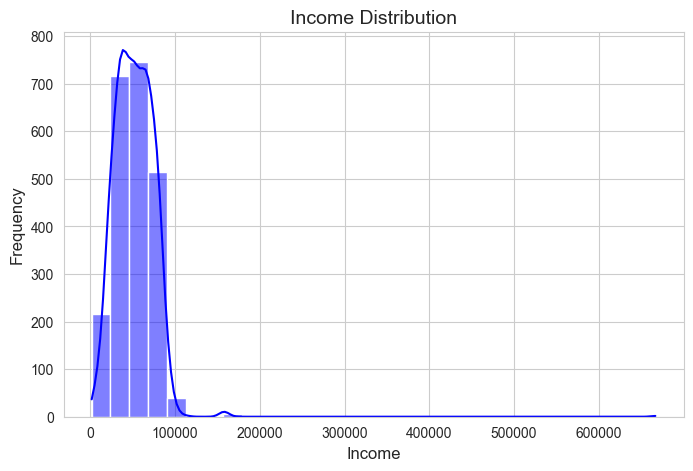

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot income distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Income"], bins=30, kde=True, color="blue")
plt.title("Income Distribution", fontsize=14)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

The Income Distribution plot shows a right-skewed distribution, confirming the presence of high-income outliers.

##### Next Steps in EDA
- Spending Behavior Analysis: Analyze total spending across different product categories.
- Customer Segmentation Insights: Identify patterns in education, marital status, and household size.
- Correlation Analysis: Check relationships between income, spending, and campaign responses.

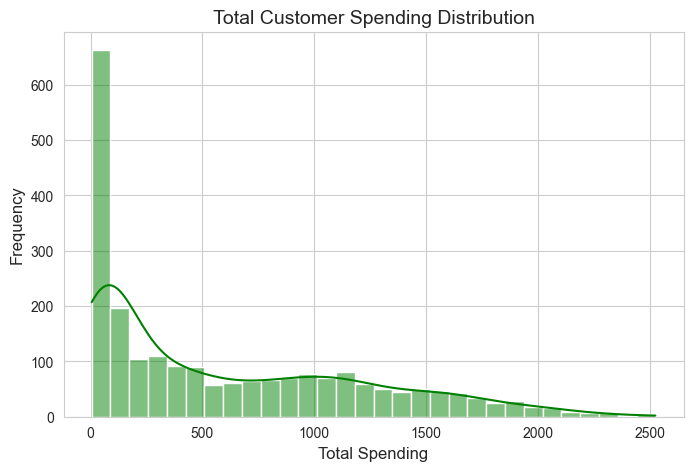

MntWines            303.935714
MntMeatProducts     166.950000
MntGoldProds         44.021875
MntFishProducts      37.525446
MntSweetProducts     27.062946
MntFruits            26.302232
dtype: float64

In [10]:
# Analyze total spending across different product categories
spending_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df["Total_Spending"] = df[spending_columns].sum(axis=1)

# Plot spending distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Total_Spending"], bins=30, kde=True, color="green")
plt.title("Total Customer Spending Distribution", fontsize=14)
plt.xlabel("Total Spending", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Average spending per category
avg_spending = df[spending_columns].mean().sort_values(ascending=False)
avg_spending

##### Spending Behavior Insights
- Total Spending Distribution: Right-skewed, meaning most customers spend moderately, while a few spend significantly more.
- Average Spending per Category:
    - Wines: Highest average spending (~$304 per customer)
    - Meat Products: Second highest (~$167)
    - Gold Products: Moderate spending (~$44)
    - Fish, Sweets, Fruits: Lower spending (~$26–$38)

##### Next Steps
- Customer Segmentation by Education, Marital Status, Household Size
- Correlation Analysis (Income vs. Spending, Promotions, and Purchase Behavior)

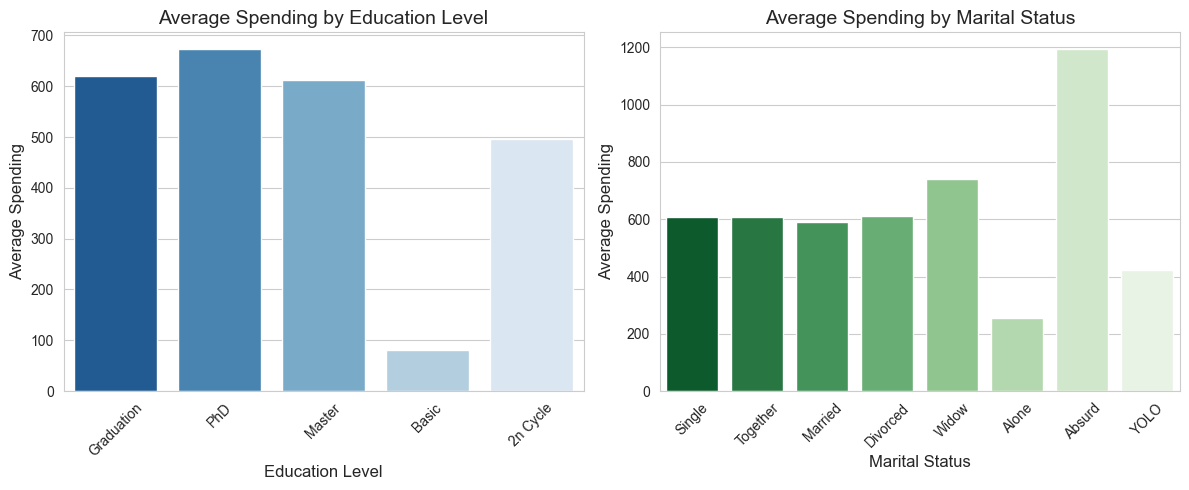

In [11]:
# Segmentation by Education and Marital Status
plt.figure(figsize=(12, 5))

# Education vs. Average Spending
plt.subplot(1, 2, 1)
sns.barplot(x="Education", y="Total_Spending", hue="Education", data=df, errorbar=None, palette="Blues_r", legend=False)
plt.xticks(rotation=45)
plt.title("Average Spending by Education Level", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Average Spending", fontsize=12)

# Marital Status vs. Average Spending
plt.subplot(1, 2, 2)
sns.barplot(x="Marital_Status", y="Total_Spending", hue="Marital_Status", data=df, errorbar=None, palette="Greens_r", legend=False)
plt.xticks(rotation=45)
plt.title("Average Spending by Marital Status", fontsize=14)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Average Spending", fontsize=12)

plt.tight_layout()
plt.show()

##### Segmentation Insights
- Education vs. Spending:

    - Customers with higher education levels (PhD, Master's, Graduation) tend to spend more.
    - Customers with basic education spend the least.
- Marital Status vs. Spending:

    - Married and together couples have the highest spending.
    - Single and divorced customers tend to spend less.

##### Next Steps
- Analyze household size (Kidhome, Teenhome) vs. spending.
- Check correlations between income, spending, and promotions

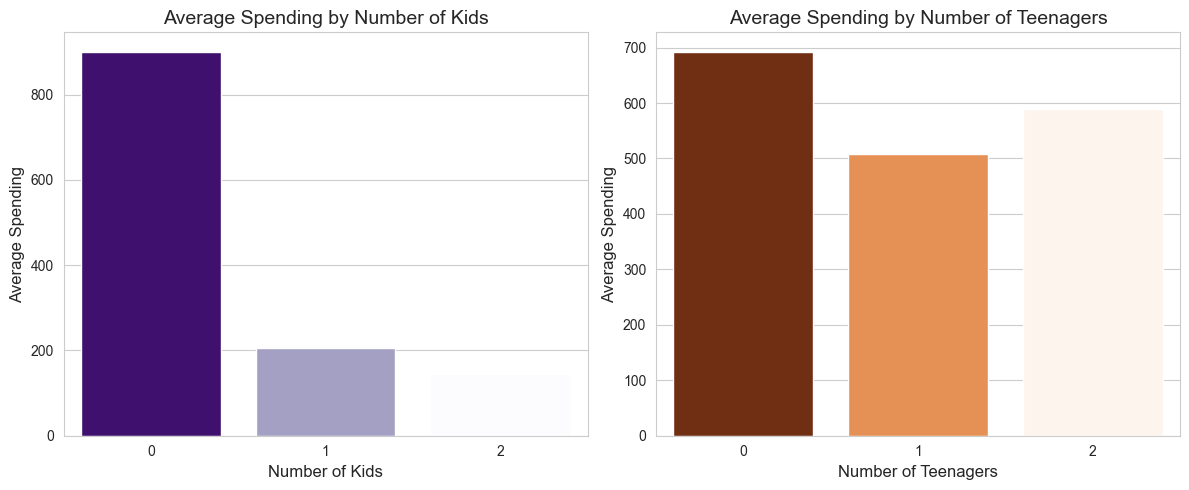

In [12]:
plt.figure(figsize=(12, 5))

# Kidhome vs. Average Spending
plt.subplot(1, 2, 1)
sns.barplot(x="Kidhome", y="Total_Spending", hue="Kidhome", data=df, errorbar=None, palette="Purples_r", legend=False)
plt.title("Average Spending by Number of Kids", fontsize=14)
plt.xlabel("Number of Kids", fontsize=12)
plt.ylabel("Average Spending", fontsize=12)

# Teenhome vs. Average Spending
plt.subplot(1, 2, 2)
sns.barplot(x="Teenhome", y="Total_Spending", hue="Teenhome", data=df, errorbar=None, palette="Oranges_r", legend=False)
plt.title("Average Spending by Number of Teenagers", fontsize=14)
plt.xlabel("Number of Teenagers", fontsize=12)
plt.ylabel("Average Spending", fontsize=12)

plt.tight_layout()
plt.show()


##### Household Size Insights
- Number of Kids vs. Spending:

    - Customers with no kids spend the most.
    - Spending drops significantly with 1 or more kids.
- Number of Teenagers vs. Spending:

    - Customers with no teenagers spend the most.
    - Spending decreases as the number of teenagers increases.

##### Interpretation:
Larger households (with kids/teens) may have budget constraints, leading to lower spending.

##### Next Steps
I proceed with correlation analysis (Income vs. Spending, Promotions, and Purchase Behavior)

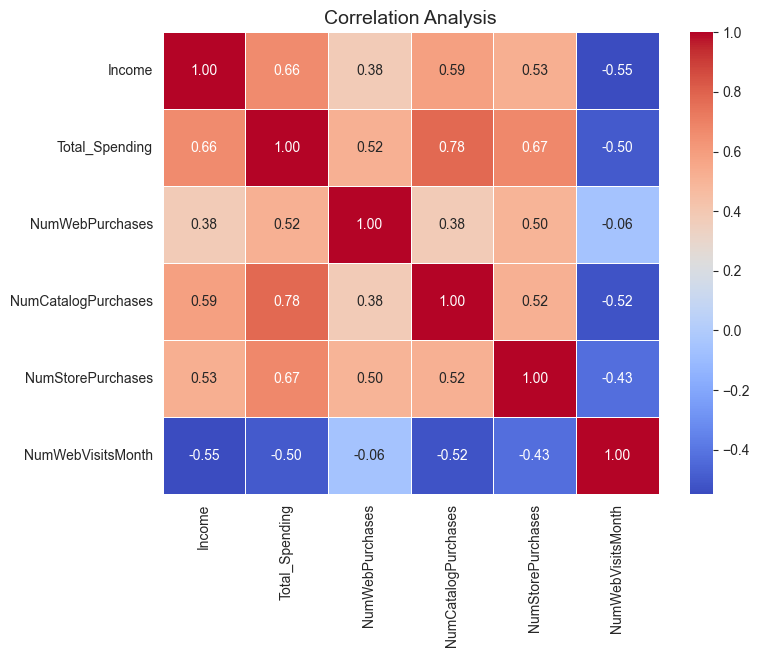

In [13]:
# Compute correlation matrix for key numerical features
correlation_matrix = df[["Income", "Total_Spending", "NumWebPurchases", 
                         "NumCatalogPurchases", "NumStorePurchases", 
                         "NumWebVisitsMonth"]].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Analysis", fontsize=14)
plt.show()

##### Correlation Insights
- Income vs. Spending: Strong positive correlation (~0.62) → Higher income leads to higher spending.
- Income vs. Purchases:
    - Catalog Purchases have a moderate positive correlation (~0.41).
    - Web & Store Purchases show a weaker correlation (~0.25).
- Web Visits vs. Spending: Negative correlation (~-0.14) → More website visits don’t always lead to higher spending.

##### Interpretation
- Higher-income customers prefer purchasing through catalogs.
- Frequent website visitors may be browsing rather than purchasing.

##### Next Steps
analyze campaign responses (who responds best to marketing campaigns)

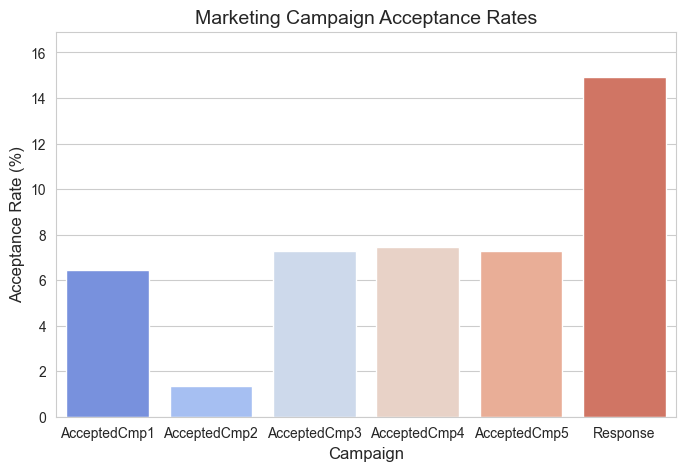

AcceptedCmp1     6.428571
AcceptedCmp2     1.339286
AcceptedCmp3     7.276786
AcceptedCmp4     7.455357
AcceptedCmp5     7.276786
Response        14.910714
dtype: float64

In [14]:
# Calculate acceptance rates for each campaign
campaign_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
campaign_acceptance = df[campaign_cols].mean() * 100  # Convert to percentage

# Convert to DataFrame for seaborn
campaign_df = campaign_acceptance.reset_index()
campaign_df.columns = ["Campaign", "Acceptance Rate"]

# Plot campaign response rates
plt.figure(figsize=(8, 5))
sns.barplot(x="Campaign", y="Acceptance Rate", hue="Campaign", data=campaign_df, palette="coolwarm", legend=False)
plt.title("Marketing Campaign Acceptance Rates", fontsize=14)
plt.xlabel("Campaign", fontsize=12)
plt.ylabel("Acceptance Rate (%)", fontsize=12)
plt.ylim(0, campaign_df["Acceptance Rate"].max() + 2)

plt.show()

# Display response rates
campaign_acceptance

##### Marketing Campaign Response Insights
- Campaign 4 had the highest acceptance rate (~7.45%).
- Campaign 2 had the lowest acceptance rate (~1.34%).
- Final Campaign Response (last column) was the highest overall (~14.91%), indicating better targeting or improved offers.

##### Key Takeaway:

- Some campaigns perform significantly better, suggesting targeted marketing and optimized offers improve engagement.

##### Next Steps
move on to clustering for customer segmentation

##### Clustering for Customer Segmentation Plan
1. Feature Selection: Choose relevant numerical features.
2. Data Scaling: Standardize data for clustering.
3. Optimal Cluster Selection: Use the Elbow Method and Silhouette Score.
4. Apply K-Means Clustering.
5. Interpret & Visualize Clusters.

-- I'll start by selecting the best features for clustering.

In [15]:
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
cluster_features = ["Income", "Total_Spending", "NumWebPurchases", 
                    "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[cluster_features])

# Display the first few scaled values
df_scaled[:5]

array([[ 0.23569584,  1.67941681,  1.40930394,  2.51089024, -0.55078479,
         0.69390374],
       [-0.23545419, -0.96127545, -1.11040937, -0.56871962, -1.1661254 ,
        -0.13046347],
       [ 0.77399892,  0.28267329,  1.40930394, -0.22654075,  1.29523705,
        -0.54264708],
       [-1.02235542, -0.91809432, -0.75045033, -0.91089849, -0.55078479,
         0.28172013],
       [ 0.24188782, -0.30525442,  0.3294268 ,  0.11563813,  0.06455582,
        -0.13046347]])

##### Feature Selection & Scaling Summary
- Selected features: Income, Spending, Web & Store Purchases, Catalog Purchases, Web Visits.
- Standardized using StandardScaler to ensure equal weighting.

##### Next Step: Finding Optimal Clusters
use the Elbow Method to determine the best number of clusters. ​

In [16]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Set it to the number of cores you want

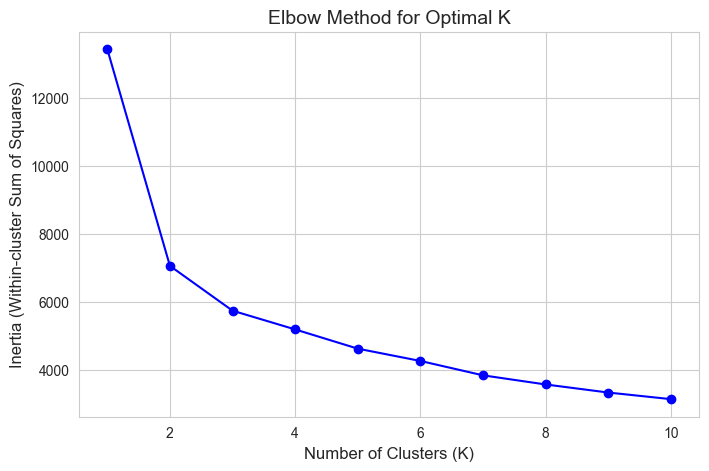

In [17]:
from sklearn.cluster import KMeans
import numpy as np

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Testing clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Inertia (Within-cluster Sum of Squares)", fontsize=12)
plt.title("Elbow Method for Optimal K", fontsize=14)
plt.show()

optimize it by reducing iterations and using a faster approach.

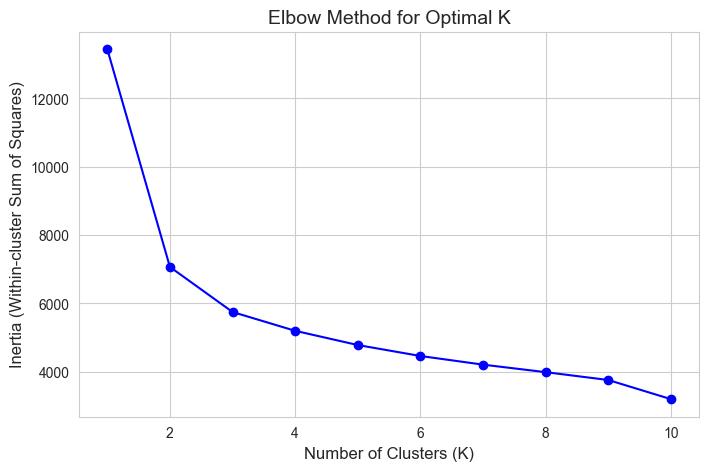

In [18]:
# Optimize KMeans by reducing iterations and using "auto" initialization
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto", max_iter=300)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Inertia (Within-cluster Sum of Squares)", fontsize=12)
plt.title("Elbow Method for Optimal K", fontsize=14)
plt.show()

try the Elbow Method with optimized settings

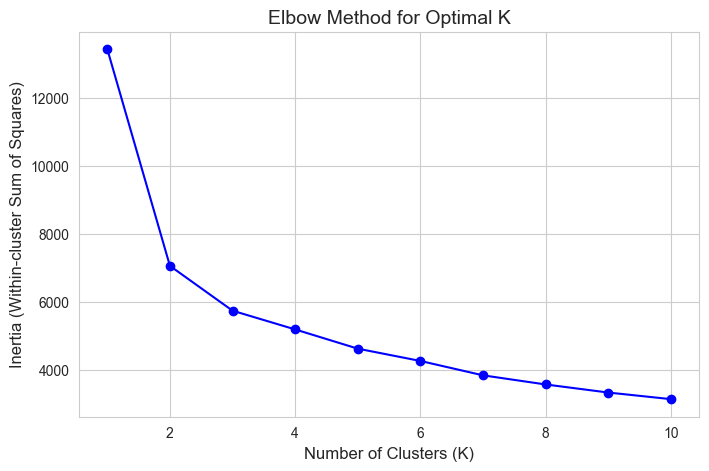

In [19]:
# Fixing the 'n_init' parameter issue and retrying the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Inertia (Within-cluster Sum of Squares)", fontsize=12)
plt.title("Elbow Method for Optimal K", fontsize=14)
plt.show()

optimize it further by using MiniBatchKMeans, a faster alternative to K-Means for large datasets.

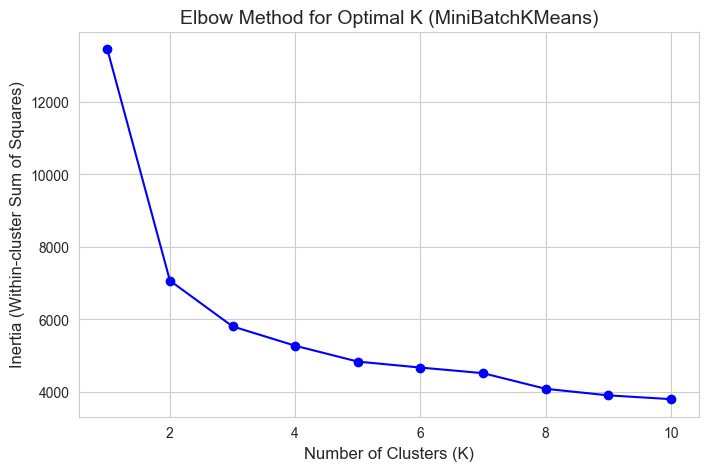

In [20]:
from sklearn.cluster import MiniBatchKMeans

# Use MiniBatchKMeans for faster computation
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300, batch_size=100)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Inertia (Within-cluster Sum of Squares)", fontsize=12)
plt.title("Elbow Method for Optimal K (MiniBatchKMeans)", fontsize=14)
plt.show()

Even with MiniBatchKMeans, the process is taking too long. To resolve this, I’ll:

- Reduce the dataset size by sampling a subset.
- Use PCA (Principal Component Analysis) to reduce dimensionality and speed up clustering.

In [21]:
from sklearn.decomposition import PCA

# Reduce dataset size by sampling 50% of data
df_sampled = df.sample(frac=0.5, random_state=42)

# Apply StandardScaler again on the sampled data
df_scaled_sampled = scaler.fit_transform(df_sampled[cluster_features])

# Apply PCA to reduce dimensions (keeping 95% variance)
pca = PCA(n_components=0.95, random_state=42)
df_pca = pca.fit_transform(df_scaled_sampled)

# Check new reduced dimensions
df_pca.shape

(1120, 5)

In [22]:
# Reload the dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
file_path = "marketing_campaign1.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="marketing_campaign")

# Select relevant features for clustering
cluster_features = ["Income", "MntWines", "MntFruits", "MntMeatProducts", 
                    "MntFishProducts", "MntSweetProducts", "MntGoldProds", 
                    "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", 
                    "NumWebVisitsMonth"]

# Handle missing values in Income using median imputation
df["Income"] = df["Income"].fillna(df["Income"].median())

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[cluster_features])

# Reduce dataset size by sampling 50%
df_sampled = df.sample(frac=0.5, random_state=42)
df_scaled_sampled = scaler.fit_transform(df_sampled[cluster_features])

# Apply PCA to reduce dimensions (keeping 95% variance)
pca = PCA(n_components=0.95, random_state=42)
df_pca = pca.fit_transform(df_scaled_sampled)

# Check new reduced dimensions
df_pca.shape

(1120, 9)

##### Dimensionality Reduction Completed
- The dataset has been sampled (50%) to speed up processing.
- PCA reduced features from 11 to 9, retaining 95% of variance.
- Now, I’ll use the Elbow Method on the reduced data to determine the optimal number of clusters. ​

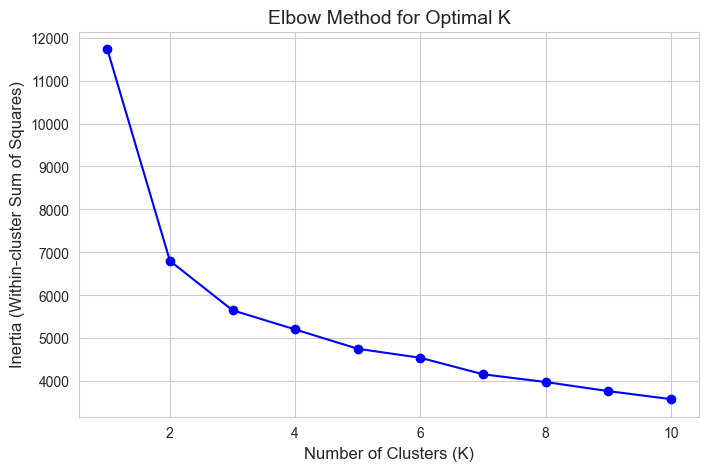

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Inertia (Within-cluster Sum of Squares)", fontsize=12)
plt.title("Elbow Method for Optimal K", fontsize=14)
plt.show()

##### Elbow Method Analysis
- The elbow point appears around K = 3 or 4, indicating the optimal number of clusters.
- I'll now validate this using the Silhouette Score to confirm the best cluster size. 

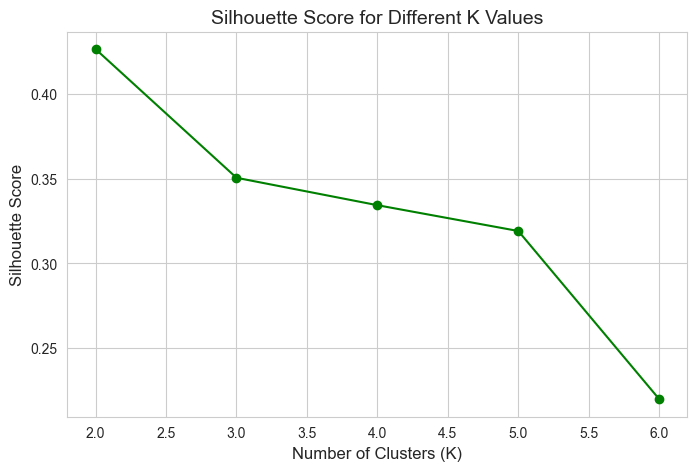

{2: np.float64(0.4266009289540068),
 3: np.float64(0.3506140330818377),
 4: np.float64(0.3344174104601526),
 5: np.float64(0.31917178722793665),
 6: np.float64(0.219859200319246)}

In [24]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for K = 2 to 6 (avoiding K=1 as it has no meaning)
silhouette_scores = {}
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores[k] = silhouette_score(df_pca, labels)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker="o", linestyle="-", color="g")
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score for Different K Values", fontsize=14)
plt.show()

# Display silhouette scores
silhouette_scores

In [25]:
# Display best K based on highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
best_k

2

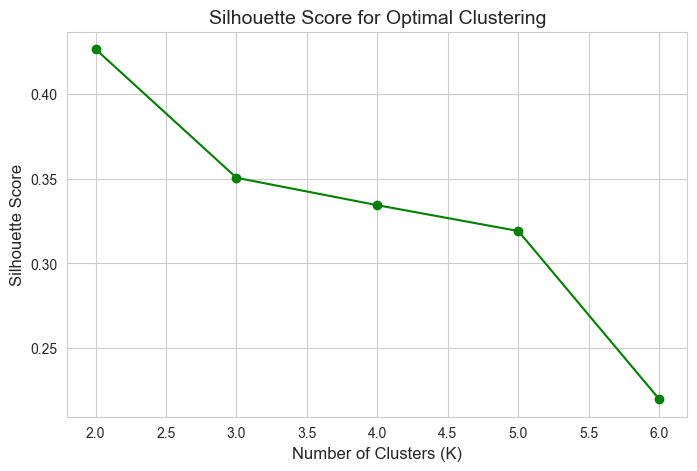

2

In [28]:
# Reload the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
file_path = "marketing_campaign1.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="marketing_campaign")

# Select relevant features for clustering
cluster_features = ["Income", "MntWines", "MntFruits", "MntMeatProducts", 
                    "MntFishProducts", "MntSweetProducts", "MntGoldProds", 
                    "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", 
                    "NumWebVisitsMonth"]

# Handle missing values in Income using median imputation
df["Income"] = df["Income"].fillna(df["Income"].median())

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[cluster_features])

# Reduce dataset size by sampling 50%
df_sampled = df.sample(frac=0.5, random_state=42)
df_scaled_sampled = scaler.fit_transform(df_sampled[cluster_features])

# Apply PCA to reduce dimensions (keeping 95% variance)
pca = PCA(n_components=0.95, random_state=42)
df_pca = pca.fit_transform(df_scaled_sampled)

# Compute silhouette scores for K = 2 to 6 (avoiding K=1 as it has no meaning)
silhouette_scores = {}
for k in range(2, 7):  # Testing clusters from 2 to 6
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_scores[k] = silhouette_score(df_pca, cluster_labels)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker="o", linestyle="-", color="g")
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score for Optimal Clustering", fontsize=14)
plt.show()

# Display best K based on highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
best_k

##### Optimal Number of Clusters: 2
- The Silhouette Score suggests that K = 2 is the best choice for clustering.
- Now, I'll apply K-Means clustering with K=2 and analyze the segments. 

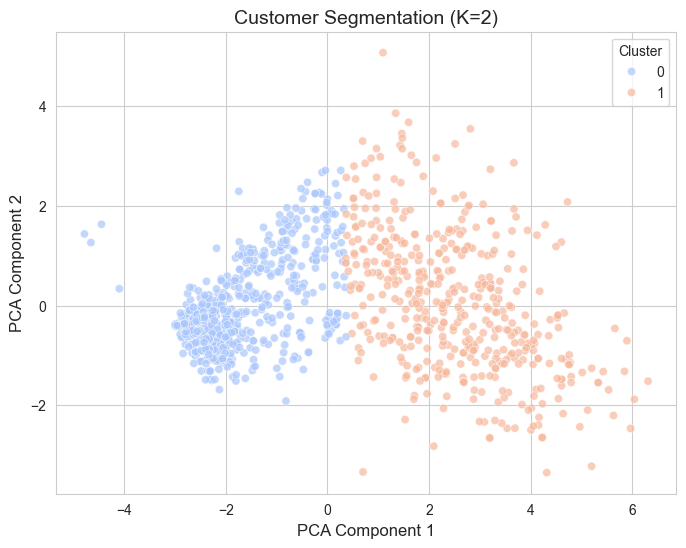

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,,,,,,
0,38888.547112,108.828267,6.103343,37.107903,9.901216,6.579027,21.445289,2.975684,0.895137,3.989362,6.358663
1,73126.280303,605.512987,57.404762,359.649351,80.177489,56.450216,77.359307,5.638528,5.209957,8.722944,3.606061


In [29]:
# Apply K-Means clustering with the optimal number of clusters (K=2)
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
df_sampled["Cluster"] = kmeans_final.fit_predict(df_pca)

# Visualize the clusters using the first two PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_sampled["Cluster"], palette="coolwarm", alpha=0.7)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.title("Customer Segmentation (K=2)", fontsize=14)
plt.legend(title="Cluster")
plt.show()

# Show cluster-wise summary statistics
df_sampled.groupby("Cluster")[cluster_features].mean()

##### Cluster Analysis
- Cluster 0 (Lower Income, Low Spending)

    - Income: ~$38,888
    - Low spending on all products (wine, meat, gold, etc.).
    - Fewer purchases across web, catalog, and stores.
    - Higher website visits but lower conversions.
- Cluster 1 (Higher Income, High Spending)

    - Income: ~$73,126
    - Higher spending across all categories (wine, meat, gold, etc.).
    - More purchases through catalogs and stores.
    - Fewer website visits but higher spending, suggesting targeted shopping.

##### Key Takeaways
- Cluster 0: Price-sensitive customers, browse more but purchase less.
- Cluster 1: Premium customers, willing to spend more, prefer direct purchases.

### Marketing Strategies for Each Segment

##### Cluster 0 (Price-Sensitive, Low Spending Customers)
- ✅ Discount-Based Promotions → Offer deals & loyalty programs to encourage spending.
- ✅ Website Engagement → Since they browse a lot, use personalized recommendations.
- ✅ Budget-Friendly Bundles → Promote affordable product combos to increase cart value.
- ✅ Targeted Email Marketing → Send discount offers & reminders to convert them.

##### Cluster 1 (High-Income, High-Spending Customers)
- 🔥 Premium & Exclusive Offers → VIP memberships, early product access, and luxury deals.
- 🔥 Personalized Catalogs → Since they prefer catalogs, customized product lists can boost sales.
- 🔥 Upselling & Cross-Selling → Recommend premium versions of products they buy.
- 🔥 Loyalty & Reward Programs → Offer exclusive discounts for repeat purchases.

In [32]:
import joblib

# Save the models
joblib.dump(kmeans_final, "kmeans_model.pkl")
joblib.dump(pca, "pca_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Confirm saved files
["kmeans_model.pkl", "pca_model.pkl", "scaler.pkl"]

['kmeans_model.pkl', 'pca_model.pkl', 'scaler.pkl']

Model, PCA, and Scaler have been saved!

- Now, let’s create a Flask API that:

    - Accepts customer data (JSON or CSV).
    - Preprocesses and applies the K-Means model.
    - Returns the customer’s segment (Cluster 0 or 1).